In [1]:
import numpy as np
import nibabel as nib
import glob
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tifffile import imsave

In [2]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [3]:
TRAIN_DATASET_PATH = 'BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/'

In [4]:
test_image_flair = nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_flair.nii').get_fdata()
print(test_image_flair.max())

1854.603271484375


In [5]:
test_image_flair = scaler.fit_transform(test_image_flair.reshape(-1, test_image_flair.shape[-1])).reshape(test_image_flair.shape)

In [6]:
test_image_t1 = nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_t1.nii').get_fdata()
test_image_t1 = scaler.fit_transform(test_image_t1.reshape(-1, test_image_t1.shape[-1])).reshape(test_image_t1.shape)

test_image_t1ce = nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_t1ce.nii').get_fdata()
test_image_t1ce = scaler.fit_transform(test_image_t1ce.reshape(-1, test_image_t1ce.shape[-1])).reshape(test_image_t1ce.shape)

test_image_t2 = nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_t2.nii').get_fdata()
test_image_t2 = scaler.fit_transform(test_image_t2.reshape(-1, test_image_t2.shape[-1])).reshape(test_image_t2.shape)

In [7]:
test_mask = nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_seg.nii').get_fdata()
test_mask = test_mask.astype(np.uint8)

In [8]:
print(np.unique(test_mask))
test_mask[test_mask == 4] = 3  #Reassign mask values 4 to 3
print(np.unique(test_mask)) 

[0 1 2 4]
[0 1 2 3]


In [9]:
import random
n_slice = random.randint(0, test_mask.shape[2])

In [10]:
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

Text(0.5, 1.0, 'Image flair')

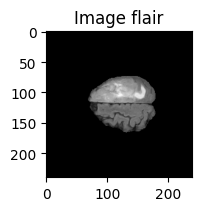

In [11]:
plt.subplot(231)
plt.imshow(test_image_flair[:,:,n_slice], cmap='gray')
plt.title('Image flair')

Text(0.5, 1.0, 'Image t1')

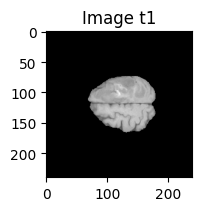

In [12]:
plt.subplot(232)
plt.imshow(test_image_t1[:,:,n_slice], cmap='gray')
plt.title('Image t1')

Text(0.5, 1.0, 'Image t1ce')

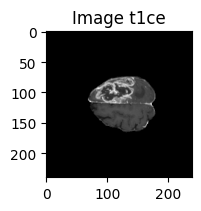

In [13]:
plt.subplot(233)
plt.imshow(test_image_t1ce[:,:,n_slice], cmap='gray')
plt.title('Image t1ce')

Text(0.5, 1.0, 'Image t2')

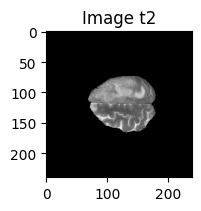

In [14]:
plt.subplot(234)
plt.imshow(test_image_t2[:,:,n_slice], cmap='gray')
plt.title('Image t2')

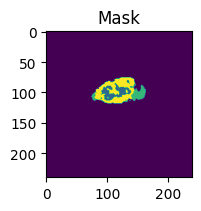

In [15]:
plt.subplot(235)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [16]:
combined_x = np.stack([test_image_flair, test_image_t1ce, test_image_t2], axis=3)

In [17]:
combined_x = combined_x[56:184, 56:184, 13:141] # crop to 128x128x128x4

In [18]:
test_mask = test_mask[56: 184, 56: 184, 13: 141]

In [19]:
n_slice = random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

Text(0.5, 1.0, 'Image flair')

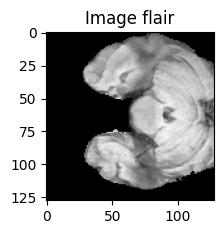

In [20]:
plt.subplot(221)
plt.imshow(combined_x[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')

Text(0.5, 1.0, 'Image t1ce')

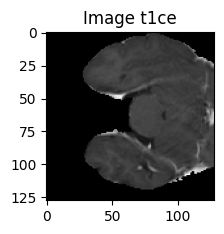

In [21]:
plt.subplot(222)
plt.imshow(combined_x[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')

Text(0.5, 1.0, 'Image t2')

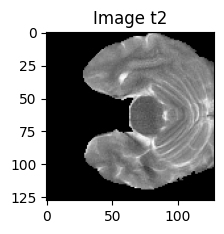

In [22]:
plt.subplot(223)
plt.imshow(combined_x[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')

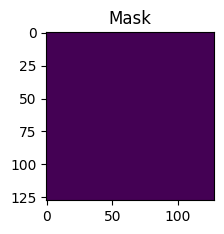

In [23]:
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [24]:
imsave('BraTS2020_TrainingData/combined255.tif', combined_x)
np.save('BraTS2020_TrainingData/combined255.npy', combined_x)

/var/folders/1v/947dbh950t19qpc2cgccf7xr0000gn/T/ipykernel_6423/2780881422.py:1: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  imsave('BraTS2020_TrainingData/combined255.tif', combined_x)


In [25]:
my_img = np.load('BraTS2020_TrainingData/combined255.npy')

In [26]:
test_mask = to_categorical(test_mask, num_classes=4)

In [27]:
t2_list = sorted(glob.glob('BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*t2.nii'))
t1ce_list = sorted(glob.glob('BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*t1ce.nii'))
flair_list = sorted(glob.glob('BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*flair.nii'))
mask_list = sorted(glob.glob('BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*seg.nii'))

In [28]:
for img in range(len(t2_list)):
    print(f"Now preparing image and masks number: {img}")
      
    temp_image_t2 = nib.load(t2_list[img]).get_fdata()
    temp_image_t2 = scaler.fit_transform(temp_image_t2.reshape(-1, temp_image_t2.shape[-1])).reshape(temp_image_t2.shape)
   
    temp_image_t1ce = nib.load(t1ce_list[img]).get_fdata()
    temp_image_t1ce = scaler.fit_transform(temp_image_t1ce.reshape(-1, temp_image_t1ce.shape[-1])).reshape(temp_image_t1ce.shape)
   
    temp_image_flair = nib.load(flair_list[img]).get_fdata()
    temp_image_flair = scaler.fit_transform(temp_image_flair.reshape(-1, temp_image_flair.shape[-1])).reshape(temp_image_flair.shape)
        
    temp_mask = nib.load(mask_list[img]).get_fdata()
    temp_mask = temp_mask.astype(np.uint8)
    temp_mask[temp_mask == 4] = 3  #Reassign mask values 4 to 3
    
    
    temp_combined_images = np.stack([temp_image_flair, temp_image_t1ce, temp_image_t2], axis=3)

    """
        crop to a size to be divisible by 64 so we can later extract 64x64x64 patches.
        cropping x, y, and z
    """ 
    temp_combined_images = temp_combined_images[56:184, 56:184, 13:141]
    temp_mask = temp_mask[56:184, 56:184, 13:141]
    
    val, counts = np.unique(temp_mask, return_counts=True)
    
    if (1 - (counts[0]/counts.sum())) > 0.01:  #At least 1% useful volume with labels that are not 0
        print(f"Saving image number: {img}")
        temp_mask = to_categorical(temp_mask, num_classes=4)
        np.save('BraTS2020_TrainingData/input_data_3channels/images/image_'+str(img)+'.npy', temp_combined_images)
        np.save('BraTS2020_TrainingData/input_data_3channels/masks/mask_'+str(img)+'.npy', temp_mask)
        
    else:
        print("I am useless")

Now preparing image and masks number: 0
Saving image number: 0
Now preparing image and masks number: 1
Saving image number: 1
Now preparing image and masks number: 2
Saving image number: 2
Now preparing image and masks number: 3
Saving image number: 3
Now preparing image and masks number: 4
I am useless
Now preparing image and masks number: 5
Saving image number: 5
Now preparing image and masks number: 6
Saving image number: 6
Now preparing image and masks number: 7
Saving image number: 7
Now preparing image and masks number: 8
Saving image number: 8
Now preparing image and masks number: 9
Saving image number: 9
Now preparing image and masks number: 10
Saving image number: 10
Now preparing image and masks number: 11
Saving image number: 11
Now preparing image and masks number: 12
Saving image number: 12
Now preparing image and masks number: 13
Saving image number: 13
Now preparing image and masks number: 14
Saving image number: 14
Now preparing image and masks number: 15
Saving image n

Now preparing image and masks number: 128
Saving image number: 128
Now preparing image and masks number: 129
Saving image number: 129
Now preparing image and masks number: 130
Saving image number: 130
Now preparing image and masks number: 131
Saving image number: 131
Now preparing image and masks number: 132
Saving image number: 132
Now preparing image and masks number: 133
Saving image number: 133
Now preparing image and masks number: 134
Saving image number: 134
Now preparing image and masks number: 135
Saving image number: 135
Now preparing image and masks number: 136
Saving image number: 136
Now preparing image and masks number: 137
Saving image number: 137
Now preparing image and masks number: 138
I am useless
Now preparing image and masks number: 139
Saving image number: 139
Now preparing image and masks number: 140
Saving image number: 140
Now preparing image and masks number: 141
I am useless
Now preparing image and masks number: 142
Saving image number: 142
Now preparing image

Saving image number: 251
Now preparing image and masks number: 252
Saving image number: 252
Now preparing image and masks number: 253
Saving image number: 253
Now preparing image and masks number: 254
Saving image number: 254
Now preparing image and masks number: 255
Saving image number: 255
Now preparing image and masks number: 256
Saving image number: 256
Now preparing image and masks number: 257
Saving image number: 257
Now preparing image and masks number: 258
Saving image number: 258
Now preparing image and masks number: 259
Saving image number: 259
Now preparing image and masks number: 260
Saving image number: 260
Now preparing image and masks number: 261
Saving image number: 261
Now preparing image and masks number: 262
Saving image number: 262
Now preparing image and masks number: 263
Saving image number: 263
Now preparing image and masks number: 264
Saving image number: 264
Now preparing image and masks number: 265
Saving image number: 265
Now preparing image and masks number:

In [29]:
import splitfolders

In [30]:
input_folder = 'BraTS2020_TrainingData/input_data_3channels/'
output_folder = 'BraTS2020_TrainingData/input_data_128/'

In [31]:
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.75, .25), group_prefix=None)